Provides overview of renewable energy power plants and their capacities

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

In [3]:
capacity_timeseries = pd.read_csv('renewable_capacity_timeseries.csv')
switzerland_data = pd.read_csv('renewable_power_plants_CH.csv')
czech_data = pd.read_csv('renewable_power_plants_CZ.csv')
denmark_data = pd.read_csv('renewable_power_plants_DK.csv')
france_data = pd.read_csv('renewable_power_plants_FR.csv')

/var/folders/qd/1pjv967d1ylfl4mzr8flbvb00000gn/T/ipykernel_25578/2365516380.py:5: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  france_data = pd.read_csv('renewable_power_plants_FR.csv')


In [9]:
# Function to explore dataset basics
def explore_dataset(df, name):
    print(f"\n==== {name} Dataset Overview ====")
    print(f"Shape: {df.shape}")
    print("\nColumn names:")
    for col in df.columns:
        print(f"  - {col}")
    
    print("\nMissing values summary:")
    missing = df.isnull().sum()
    print(missing[missing > 0].sort_values(ascending=False))
    
    print("\nData types:")
    print(df.dtypes.value_counts())
    
    print("\nSample data (1 rows):")
    print(df.head(100))

explore_dataset(capacity_timeseries, "Renewable Capacity Time Series")


==== Renewable Capacity Time Series Dataset Overview ====
Shape: (44166, 40)

Column names:
  - day
  - CH_bioenergy_capacity
  - CH_solar_capacity
  - CH_wind_onshore_capacity
  - DE_bioenergy_capacity
  - DE_geothermal_capacity
  - DE_solar_capacity
  - DE_wind_capacity
  - DE_wind_offshore_capacity
  - DE_wind_onshore_capacity
  - DK_solar_capacity
  - DK_wind_capacity
  - DK_wind_offshore_capacity
  - DK_wind_onshore_capacity
  - FR_bioenergy_capacity
  - FR_geothermal_capacity
  - FR_hydro_capacity
  - FR_marine_capacity
  - FR_solar_capacity
  - FR_wind_onshore_capacity
  - GB-GBN_bioenergy_capacity
  - GB-GBN_hydro_capacity
  - GB-GBN_marine_capacity
  - GB-GBN_solar_capacity
  - GB-GBN_wind_capacity
  - GB-GBN_wind_offshore_capacity
  - GB-GBN_wind_onshore_capacity
  - GB-NIR_bioenergy_capacity
  - GB-NIR_solar_capacity
  - GB-NIR_wind_onshore_capacity
  - GB-UKM_bioenergy_capacity
  - GB-UKM_hydro_capacity
  - GB-UKM_marine_capacity
  - GB-UKM_solar_capacity
  - GB-UKM_wind_c

In [10]:
# Process timestamps for time series analysis
if 'day' in capacity_timeseries.columns:
    capacity_timeseries['day'] = pd.to_datetime(capacity_timeseries['day'])
    capacity_timeseries['year'] = capacity_timeseries['day'].dt.year
    capacity_timeseries['month'] = capacity_timeseries['day'].dt.month

    print("\nTime range in capacity data:")
    print(f"Start: {capacity_timeseries['day'].min()}")
    print(f"End: {capacity_timeseries['day'].max()}")
    print(f"Duration: {(capacity_timeseries['day'].max() - capacity_timeseries['day'].min()).days} days")


Time range in capacity data:
Start: 1900-01-01 00:00:00
End: 2020-12-02 00:00:00
Duration: 44165 days


In [11]:
# Process installation data to get energy source distribution
def analyze_energy_mix(df, country_name):
    if 'energy_source_level_2' in df.columns:
        print(f"\nEnergy source distribution for {country_name}:")
        source_counts = df['energy_source_level_2'].value_counts()
        print(source_counts)
        
        # Analyze capacity by energy source
        if 'electrical_capacity' in df.columns:
            capacity_by_source = df.groupby('energy_source_level_2')['electrical_capacity'].agg(['sum', 'count', 'mean']).sort_values('sum', ascending=False)
            print(f"\nCapacity statistics by energy source for {country_name}:")
            print(capacity_by_source)
            
            return source_counts, capacity_by_source
    return None, None

# Analyze energy mix for each country dataset
swiss_mix, swiss_capacity = analyze_energy_mix(switzerland_data, "Switzerland")
czech_mix, czech_capacity = analyze_energy_mix(czech_data, "Czech Republic")
denmark_mix, denmark_capacity = analyze_energy_mix(denmark_data, "Denmark")
france_mix, france_capacity = analyze_energy_mix(france_data, "France")


Energy source distribution for Switzerland:
energy_source_level_2
Solar        11841
Hydro          575
Bioenergy      264
Wind            38
Name: count, dtype: int64

Capacity statistics by energy source for Switzerland:
                             sum  count      mean
energy_source_level_2                            
Solar                  620.39925  11841  0.052394
Hydro                  441.97886    575  0.768659
Bioenergy               87.16520    264  0.330171
Wind                    64.17300     38  1.688763

Energy source distribution for Czech Republic:
energy_source_level_2
Solar                   28571
Hydro                    1611
Bioenergy                1296
Wind                      122
Other or unspecified        4
Name: count, dtype: int64

Capacity statistics by energy source for Czech Republic:
                            sum  count      mean
energy_source_level_2                           
Solar                  2134.479  28571  0.074708
Bioenergy              15

Available solar capacity columns: ['CH_solar_capacity', 'DE_solar_capacity', 'DK_solar_capacity', 'FR_solar_capacity', 'GB-GBN_solar_capacity', 'GB-NIR_solar_capacity', 'GB-UKM_solar_capacity']
Available wind capacity columns: ['DE_wind_capacity', 'DK_wind_capacity', 'GB-GBN_wind_capacity', 'GB-UKM_wind_capacity', 'SE_wind_capacity']


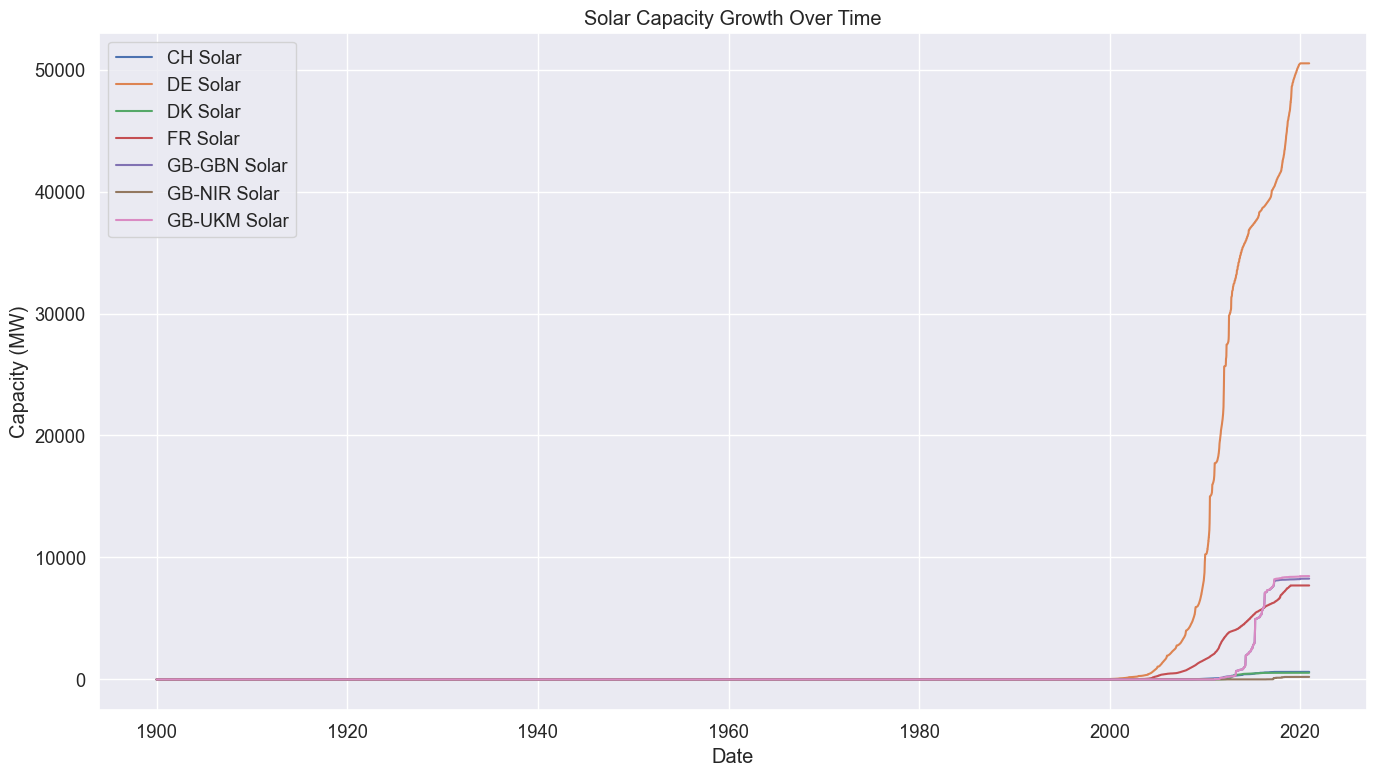

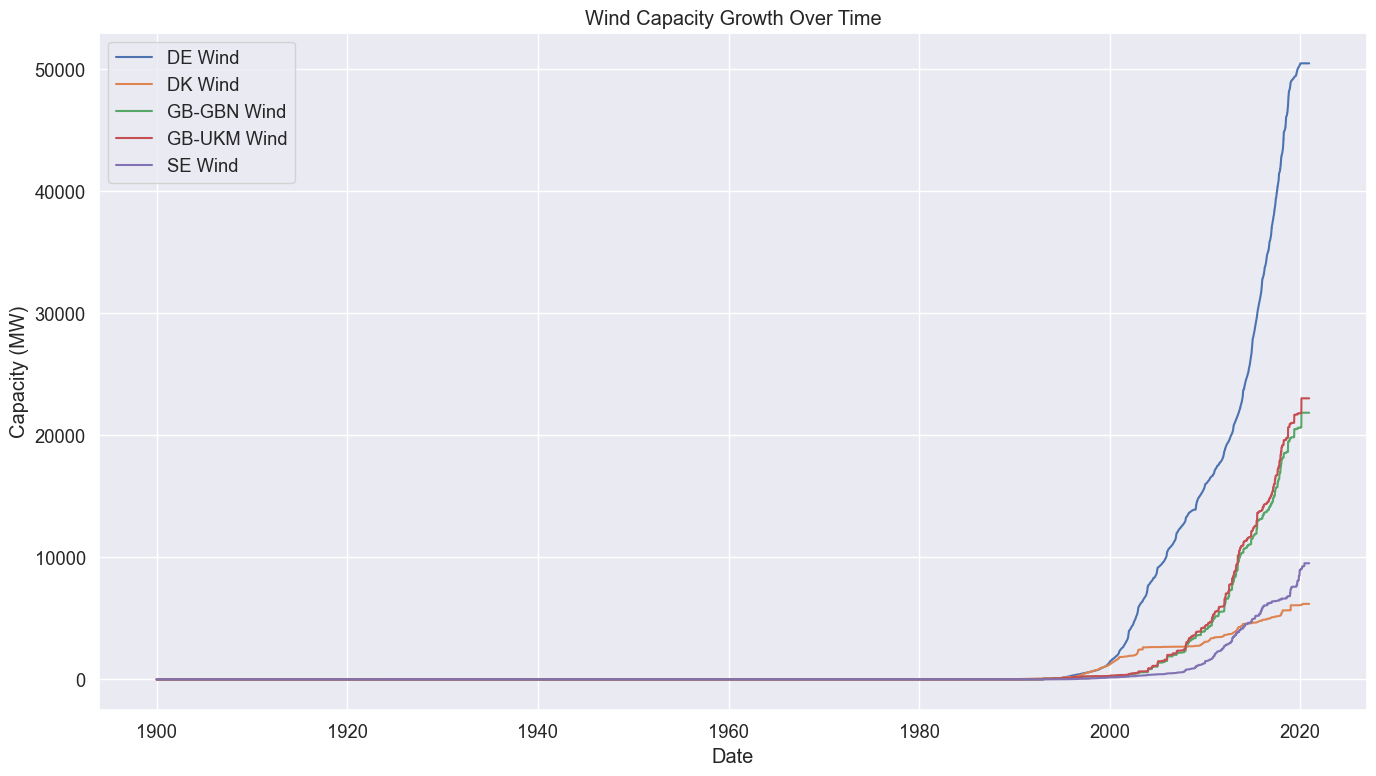

In [13]:
# Focus on key renewable sources for microgrids (solar and wind)
if 'day' in capacity_timeseries.columns:
    # Extract solar and wind columns
    solar_cols = [col for col in capacity_timeseries.columns if 'solar_capacity' in col]
    wind_cols = [col for col in capacity_timeseries.columns if 'wind_capacity' in col and 'offshore' not in col and 'onshore' not in col]
    
    print(f"Available solar capacity columns: {solar_cols}")
    print(f"Available wind capacity columns: {wind_cols}")
    
    # Plot capacity growth for selected countries
    plt.figure(figsize=(14, 8))
    
    # Plot solar capacity trends
    for col in solar_cols:
        country = col.split('_')[0]
        plt.plot(capacity_timeseries['day'], capacity_timeseries[col], label=f"{country} Solar")
    
    plt.title('Solar Capacity Growth Over Time')
    plt.xlabel('Date')
    plt.ylabel('Capacity (MW)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Plot wind capacity trends
    plt.figure(figsize=(14, 8))
    for col in wind_cols:
        country = col.split('_')[0]
        plt.plot(capacity_timeseries['day'], capacity_timeseries[col], label=f"{country} Wind")
    
    plt.title('Wind Capacity Growth Over Time')
    plt.xlabel('Date')
    plt.ylabel('Capacity (MW)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



Installation size statistics for Switzerland:
count    12718.000000
mean         0.095433
std          0.556174
min          0.000400
25%          0.005400
50%          0.010600
75%          0.047300
max         24.300000
Name: electrical_capacity, dtype: float64


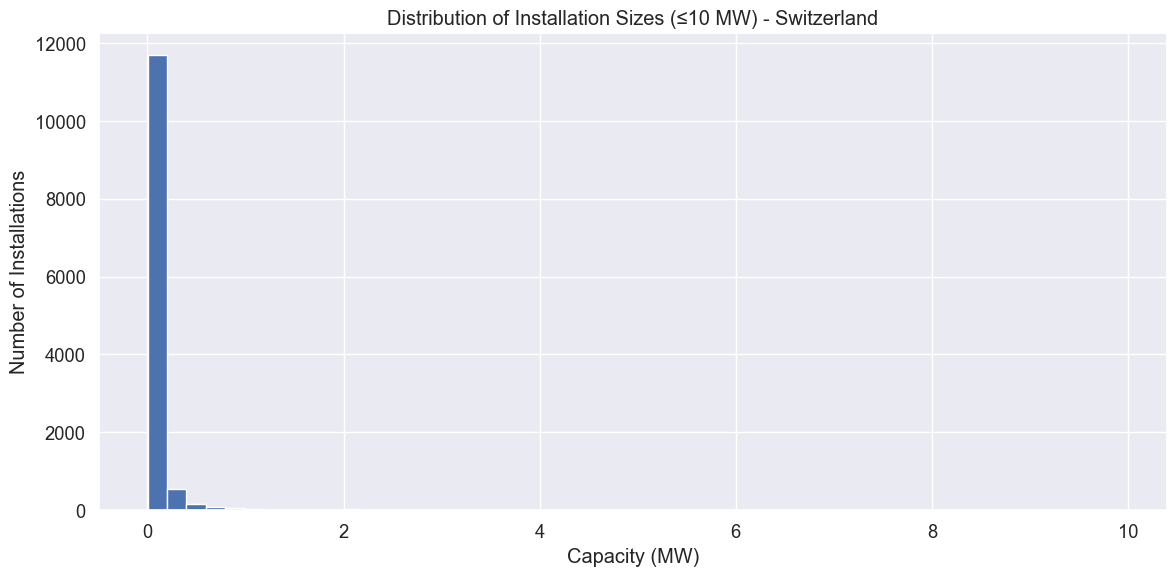


Microgrid-scale installations (≤10 MW) by energy source for Switzerland:
                       count      mean        sum
energy_source_level_2                            
Solar                  11841  0.052394  620.39925
Hydro                    568  0.585656  332.65286
Bioenergy                263  0.251579   66.16520
Wind                      38  1.688763   64.17300


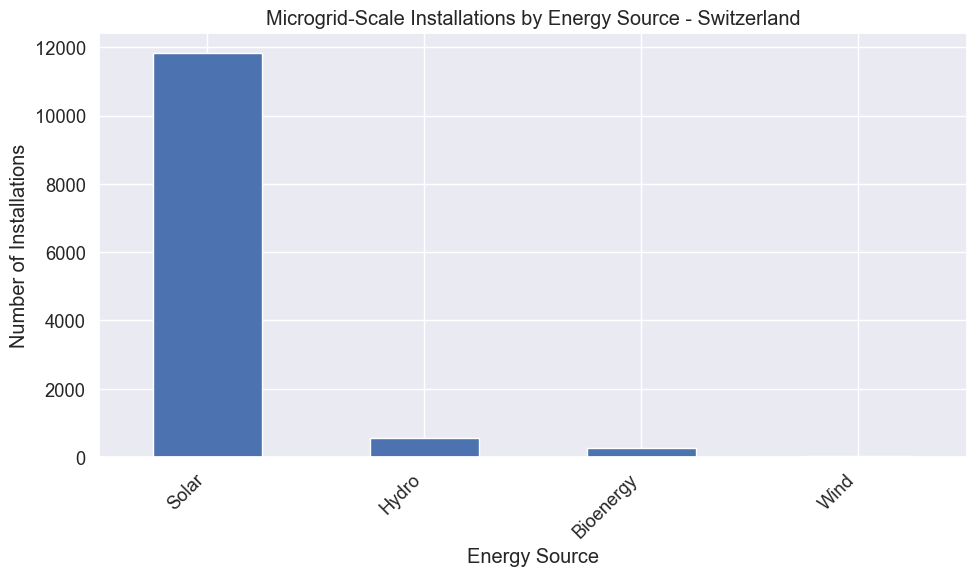


Installation size statistics for Czech Republic:
count    31604.000000
mean         0.163030
std          4.070598
min          0.001000
25%          0.005000
50%          0.008000
75%          0.024000
max        569.500000
Name: electrical_capacity, dtype: float64


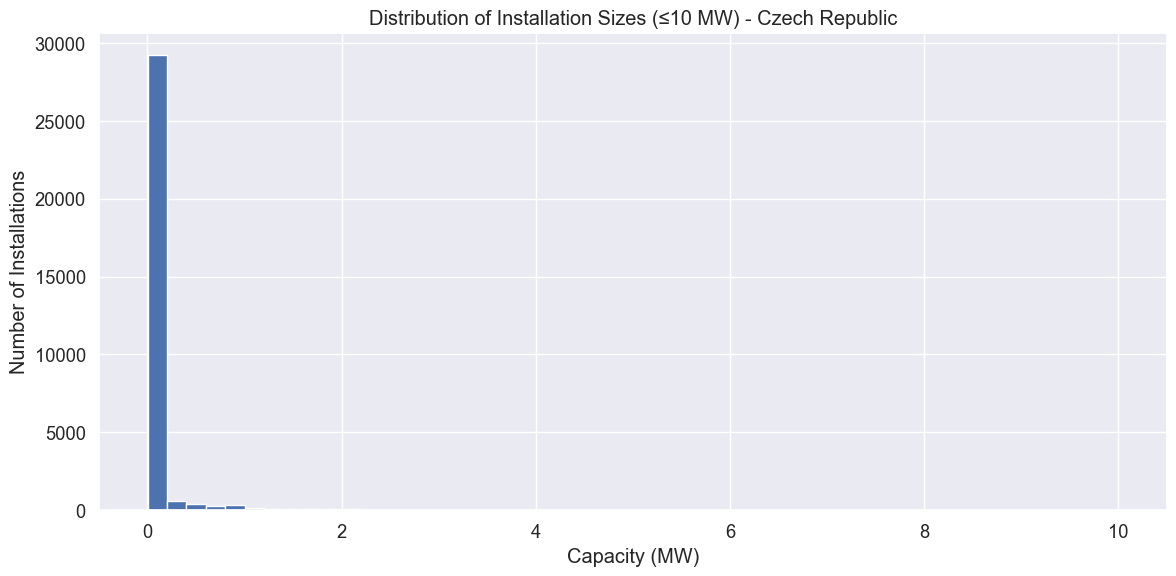


Microgrid-scale installations (≤10 MW) by energy source for Czech Republic:
                       count      mean       sum
energy_source_level_2                           
Solar                  28564  0.068651  1960.960
Hydro                   1603  0.226237   362.658
Bioenergy               1289  0.572261   737.645
Wind                     116  1.833853   212.727
Other or unspecified       4  0.155000     0.620


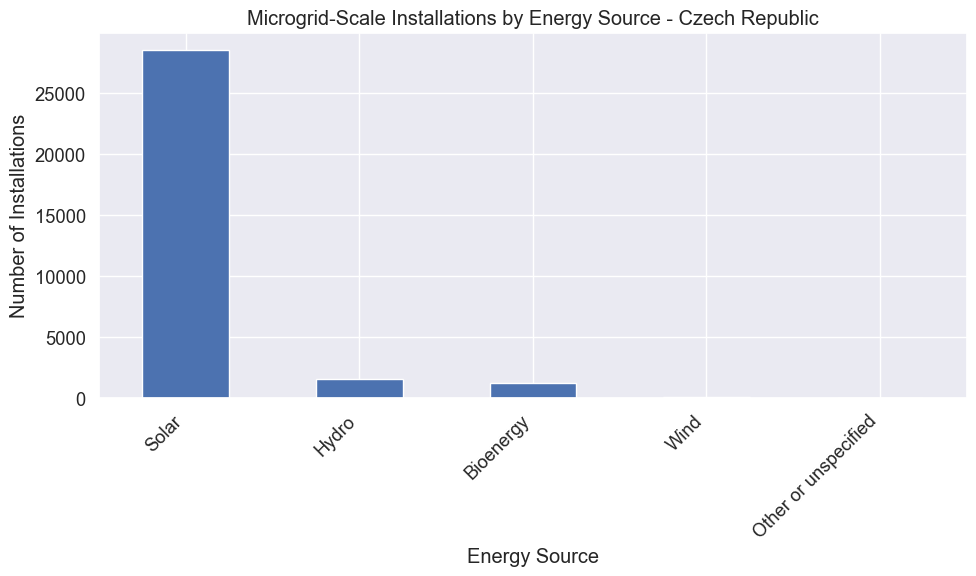


Installation size statistics for Denmark:
count    84353.000000
mean         0.079857
std          0.429782
min          0.000000
25%          0.004000
50%          0.006000
75%          0.006000
max         10.000000
Name: electrical_capacity, dtype: float64


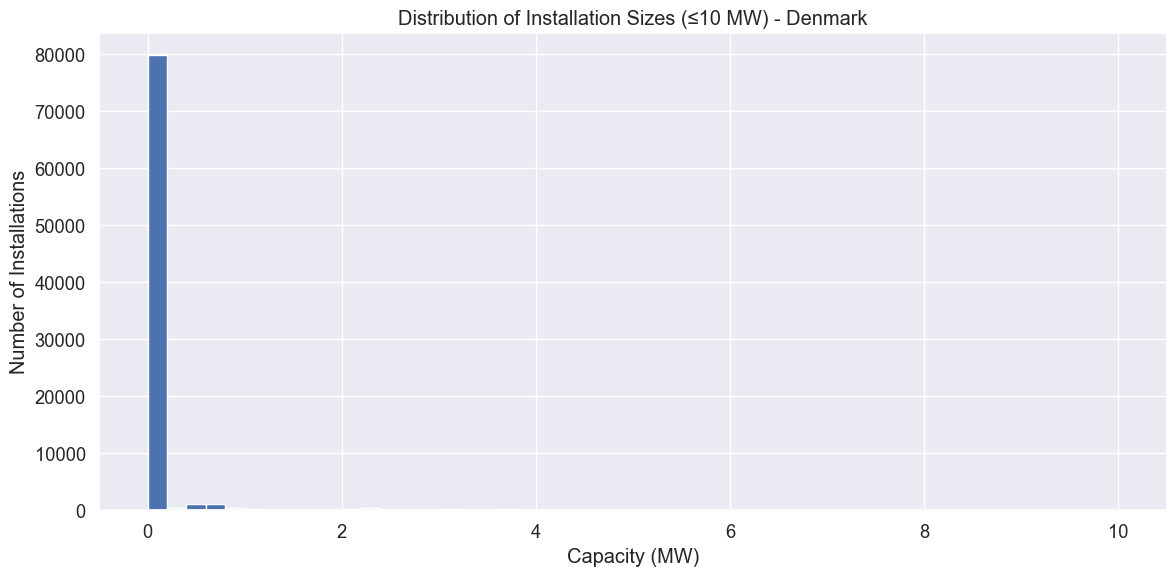


Microgrid-scale installations (≤10 MW) by energy source for Denmark:
                       count      mean        sum
energy_source_level_2                            
Solar                  78148  0.007016   548.2721
Wind                    6205  0.997242  6187.8885


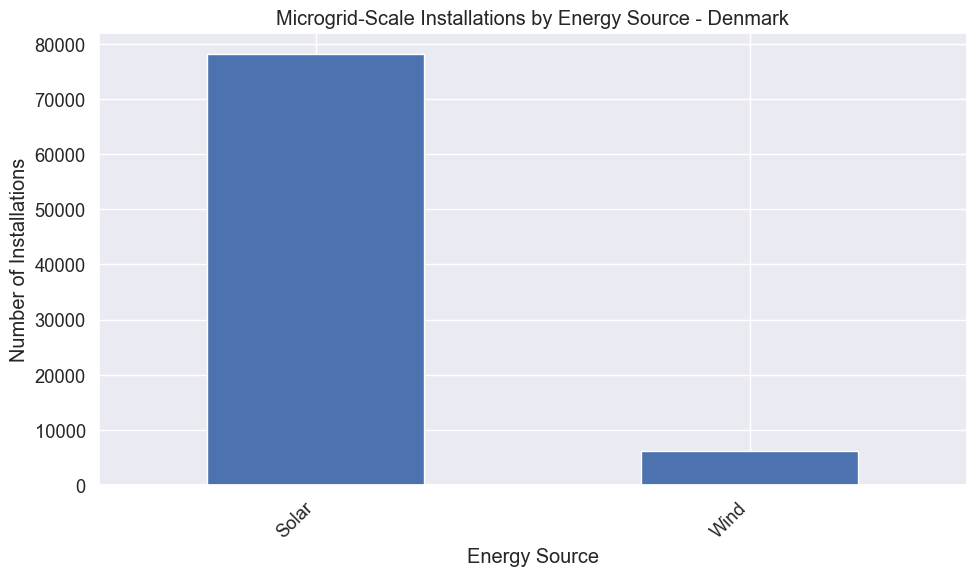


Installation size statistics for France:
count    56097.000000
mean         0.465744
std          1.957015
min          0.001000
25%          0.026260
50%          0.078240
75%          0.115700
max         80.000000
Name: electrical_capacity, dtype: float64


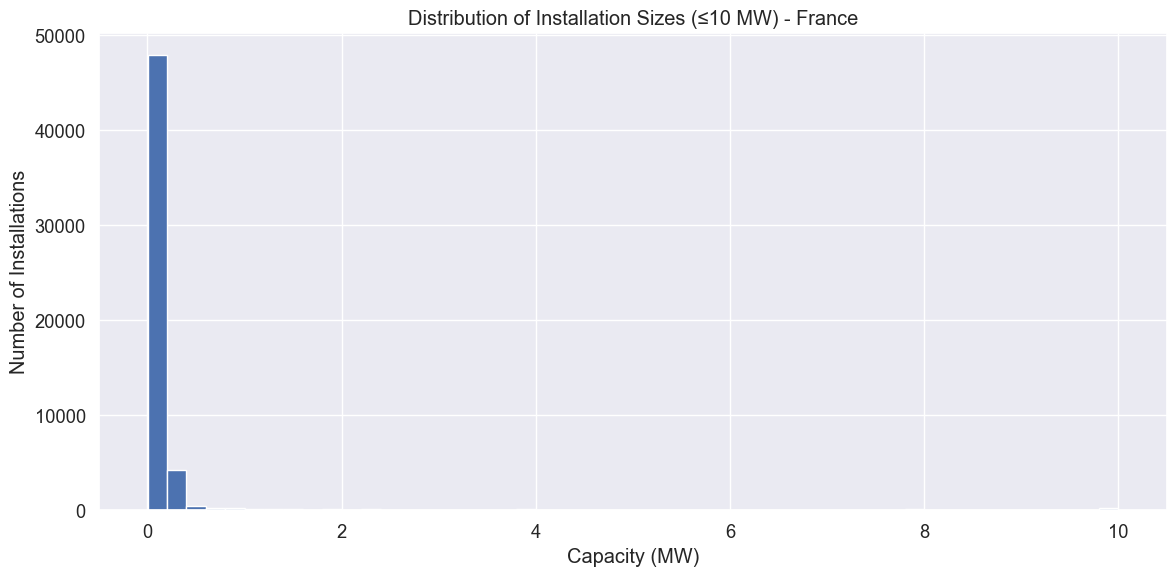


Microgrid-scale installations (≤10 MW) by energy source for France:
                       count      mean          sum
energy_source_level_2                              
Solar                  51801  0.142415  7377.232101
Hydro                   2094  0.828718  1735.334600
Wind                     908  7.009429  6364.561290
Bioenergy                498  1.196507   595.860450
Marine                     2  1.375000     2.750000
Geothermal                 1  1.850000     1.850000


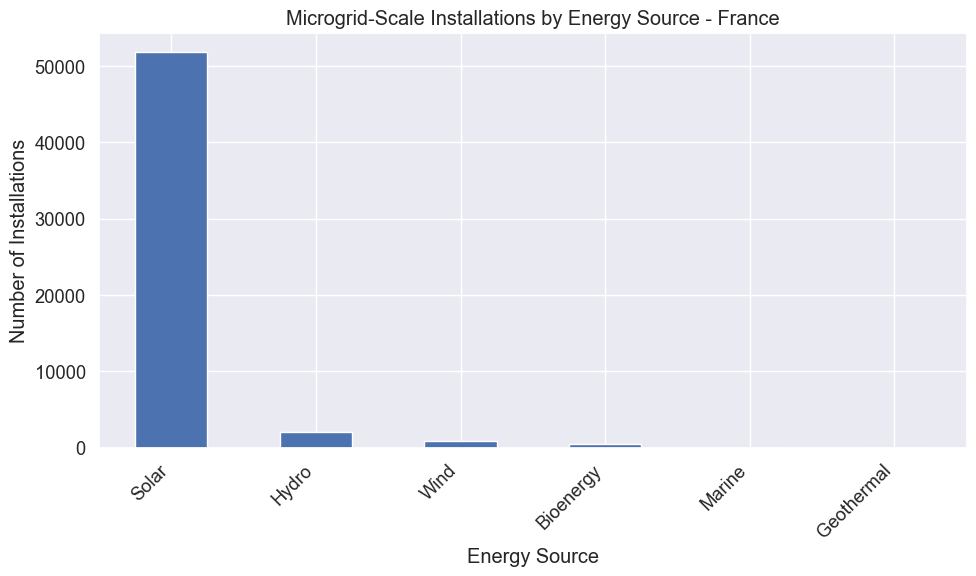

In [14]:
def analyze_installation_sizes(df, country_name):
    if 'electrical_capacity' in df.columns:
        print(f"\nInstallation size statistics for {country_name}:")
        capacity_stats = df['electrical_capacity'].describe()
        print(capacity_stats)
        
        # Plot histogram of installation sizes
        plt.figure(figsize=(12, 6))
        
        # Focus on installations below 10 MW (microgrid scale)
        microgrid_scale = df[df['electrical_capacity'] <= 10]
        
        plt.hist(microgrid_scale['electrical_capacity'], bins=50)
        plt.title(f'Distribution of Installation Sizes (≤10 MW) - {country_name}')
        plt.xlabel('Capacity (MW)')
        plt.ylabel('Number of Installations')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        
        # Analyze microgrid-scale installations by energy source
        if 'energy_source_level_2' in df.columns:
            microgrid_by_source = microgrid_scale.groupby('energy_source_level_2')['electrical_capacity'].agg(['count', 'mean', 'sum']).sort_values('count', ascending=False)
            print(f"\nMicrogrid-scale installations (≤10 MW) by energy source for {country_name}:")
            print(microgrid_by_source)
            
            # Plot energy mix for microgrid-scale installations
            plt.figure(figsize=(10, 6))
            microgrid_by_source['count'].plot(kind='bar')
            plt.title(f'Microgrid-Scale Installations by Energy Source - {country_name}')
            plt.xlabel('Energy Source')
            plt.ylabel('Number of Installations')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

# Analyze installation sizes for each country
analyze_installation_sizes(switzerland_data, "Switzerland")
analyze_installation_sizes(czech_data, "Czech Republic")
analyze_installation_sizes(denmark_data, "Denmark")
analyze_installation_sizes(france_data, "France")

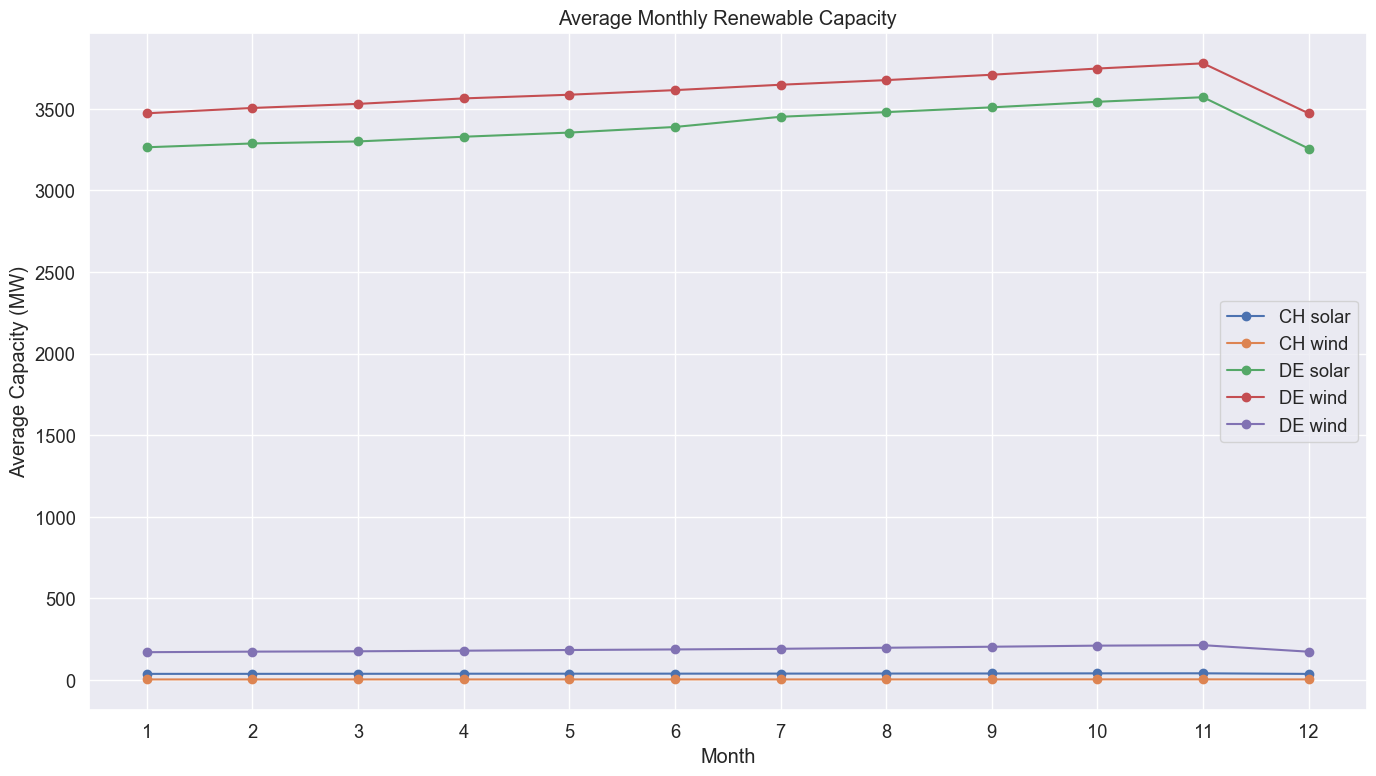

In [16]:
if 'day' in capacity_timeseries.columns and 'month' in capacity_timeseries.columns:
    # Group by month to see seasonal patterns in capacity additions
    monthly_capacity = capacity_timeseries.groupby('month').agg({
        col: 'mean' for col in capacity_timeseries.columns if 'capacity' in col
    })
    
    # Select a few key columns to visualize
    key_cols = [col for col in monthly_capacity.columns if 'solar' in col or 'wind' in col][:5]
    
    if key_cols:
        plt.figure(figsize=(14, 8))
        for col in key_cols:
            country = col.split('_')[0]
            energy_type = col.split('_')[1]
            plt.plot(monthly_capacity.index, monthly_capacity[col], marker='o', label=f"{country} {energy_type}")
        
        plt.title('Average Monthly Renewable Capacity')
        plt.xlabel('Month')
        plt.ylabel('Average Capacity (MW)')
        plt.xticks(range(1, 13))
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# 7. Analysis of commissioning dates - important for 